<h1>Airbnb Data Cleaning and Exploration<h1>

In [1]:
#Importing necessary libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings("ignore")

In [3]:
#Loading the data
air_bnb = pd.read_csv('./data/Airbnb_Open_Data.csv')
air_bnb.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,07/05/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
air_bnb.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

<h3>Data Cleaning and Preparation<h3>

In [5]:
#Dropping unnnecessary columns
air_bnb.drop(['lat', 'long', 'NAME','last review','house_rules','license','country','country code','instant_bookable','calculated host listings count'],axis='columns',inplace=True)

In [6]:
#Rename column
air_bnb.rename(columns={'neighbourhood group':'city'},inplace=True)

In [7]:
air_bnb.head(5)

,id,host id,host_identity_verified,host name,city,neighbourhood,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,availability 365
0,1001254,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,strict,Private room,2020.0,966,193.0,10.0,9.0,0.21,4.0,286.0
1,1002102,52335172823,verified,Jenna,Manhattan,Midtown,moderate,Entire home/apt,2007.0,142,28.0,30.0,45.0,0.38,4.0,228.0
2,1002403,78829239556,NaN,Elise,Manhattan,Harlem,flexible,Private room,2005.0,620,124.0,3.0,0.0,NaN,5.0,352.0
3,1002755,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,moderate,Entire home/apt,2005.0,368,74.0,30.0,270.0,4.64,4.0,322.0
4,1003689,92037596077,verified,Lyndon,Manhattan,East Harlem,moderate,Entire home/apt,2009.0,204,41.0,10.0,9.0,0.10,3.0,289.0


In [8]:
#Checking for null values
air_bnb.isnull().sum()

id                            0
host id                       0
host_identity_verified      289
host name                   406
city                         29
neighbourhood                16
cancellation_policy          76
room type                     0
Construction year           214
price                       247
service fee                 273
minimum nights              409
number of reviews           183
reviews per month         15879
review rate number          326
availability 365            448
dtype: int64

In [9]:
#Removing null values
air_bnb = air_bnb.dropna(how='any',axis='rows')

In [10]:
air_bnb.isnull().sum()

id                        0
host id                   0
host_identity_verified    0
host name                 0
city                      0
neighbourhood             0
cancellation_policy       0
room type                 0
Construction year         0
price                     0
service fee               0
minimum nights            0
number of reviews         0
reviews per month         0
review rate number        0
availability 365          0
dtype: int64

In [11]:
air_bnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84707 entries, 0 to 102597
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      84707 non-null  int64  
 1   host id                 84707 non-null  int64  
 2   host_identity_verified  84707 non-null  object 
 3   host name               84707 non-null  object 
 4   city                    84707 non-null  object 
 5   neighbourhood           84707 non-null  object 
 6   cancellation_policy     84707 non-null  object 
 7   room type               84707 non-null  object 
 8   Construction year       84707 non-null  float64
 9   price                   84707 non-null  object 
 10  service fee             84707 non-null  float64
 11  minimum nights          84707 non-null  float64
 12  number of reviews       84707 non-null  float64
 13  reviews per month       84707 non-null  float64
 14  review rate number      84707 non-nul

<h3>Features Engineering<h3>

In [12]:
#Latest year in the dataset
air_bnb['Construction year'].max()

2022.0

In [13]:
#Creating new column to store age of property
air_bnb['property_age'] = air_bnb['Construction year'].apply(lambda x: 2022-x)

#Dropping
air_bnb.drop(['Construction year'],inplace=True,axis='columns')
air_bnb.sample(5)

,id,host id,host_identity_verified,host name,city,neighbourhood,cancellation_policy,room type,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,availability 365,property_age
11429,7313573,31382506995,verified,Bobby,Manhattan,Midtown,flexible,Private room,736,147.0,1.0,1.0,0.02,3.0,299.0,0.0
91623,51604719,94443048773,unconfirmed,Daniel,Brooklyn,Prospect Heights,moderate,Entire home/apt,"1,115",223.0,3.0,2.0,0.07,3.0,0.0,0.0
12504,7907295,48838379962,unconfirmed,Alisha,Brooklyn,Williamsburg,moderate,Private room,866,173.0,7.0,2.0,0.05,5.0,49.0,6.0
66981,37994942,40065107975,verified,Patnaree,Brooklyn,Bedford-Stuyvesant,strict,Entire home/apt,709,142.0,2.0,1.0,0.05,2.0,254.0,15.0
51348,29360836,16818639412,unconfirmed,Ana,Queens,Queens Village,moderate,Entire home/apt,540,108.0,1.0,2.0,2.00,5.0,333.0,19.0


In [14]:
#changing column datatypes to float
air_bnb['minimum nights'] = air_bnb['minimum nights'].astype('float64',copy=False)
air_bnb['review rate number'] = air_bnb['review rate number'].astype('float64',copy=False)
air_bnb['availability 365'] = air_bnb['availability 365'].astype('float64',copy=False)
air_bnb['number of reviews'] = air_bnb['number of reviews'].astype('float64',copy=False)
air_bnb['property_age'] = air_bnb['property_age'].astype('int64',copy=False)                                                                  

In [15]:
#changing column datatypes to integer
air_bnb['minimum nights'] = air_bnb['minimum nights'].astype('int64',copy=False)
air_bnb['review rate number'] = air_bnb['review rate number'].astype('int64',copy=False)
air_bnb['availability 365'] = air_bnb['availability 365'].astype('int64',copy=False)
air_bnb['property_age'] = air_bnb['property_age'].astype('int64',copy=False)
air_bnb['number of reviews'] = air_bnb['number of reviews'].astype('int64',copy=False)

In [16]:
air_bnb.sample(5)

,id,host id,host_identity_verified,host name,city,neighbourhood,cancellation_policy,room type,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,availability 365,property_age
90863,51184971,47457219146,verified,Rocco,Manhattan,Harlem,strict,Entire home/apt,"1,172",234.0,3,56,2.01,3,256,2
54535,31121017,8189679873,unconfirmed,Joanne,Brooklyn,East Flatbush,moderate,Entire home/apt,790,158.0,3,11,2.10,3,338,9
102154,35559852,57136440621,unconfirmed,Diana,Brooklyn,Crown Heights,moderate,Entire home/apt,850,170.0,30,1,0.25,2,356,18
42599,24528764,61810406433,verified,Bilikis,Queens,Rockaway Beach,moderate,Private room,"1,173",235.0,1,1,0.67,2,179,3
52341,29909270,15144444750,unconfirmed,Dan,Brooklyn,Sunset Park,strict,Entire home/apt,"1,135",227.0,2,174,2.28,5,82,7


In [17]:
air_bnb.price

0           966
1           142
3           368
4           204
5           577
          ...  
102588      618
102591    1,139
102593    1,099
102595      837
102597      546
Name: price, Length: 84707, dtype: object

In [18]:
def rem_comma(x):
    splits = x.split(',')
    if len(splits) == 2:
        return(splits[0]+splits[1])
    else:
        return x

In [19]:
air_bnb['price'] = air_bnb['price'].apply(rem_comma)
air_bnb.head(5)

,id,host id,host_identity_verified,host name,city,neighbourhood,cancellation_policy,room type,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,availability 365,property_age
0,1001254,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,strict,Private room,966,193.0,10,9,0.21,4,286,2
1,1002102,52335172823,verified,Jenna,Manhattan,Midtown,moderate,Entire home/apt,142,28.0,30,45,0.38,4,228,15
3,1002755,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,moderate,Entire home/apt,368,74.0,30,270,4.64,4,322,17
4,1003689,92037596077,verified,Lyndon,Manhattan,East Harlem,moderate,Entire home/apt,204,41.0,10,9,0.10,3,289,13
5,1004098,45498551794,verified,Michelle,Manhattan,Murray Hill,flexible,Entire home/apt,577,115.0,3,74,0.59,3,374,9


In [20]:
#changing price column datatype
air_bnb['price'] = air_bnb['price'].astype('float64',copy=False)

<h3>Outlier Removal/Detection<h3>

In [21]:
air_bnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84707 entries, 0 to 102597
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      84707 non-null  int64  
 1   host id                 84707 non-null  int64  
 2   host_identity_verified  84707 non-null  object 
 3   host name               84707 non-null  object 
 4   city                    84707 non-null  object 
 5   neighbourhood           84707 non-null  object 
 6   cancellation_policy     84707 non-null  object 
 7   room type               84707 non-null  object 
 8   price                   84707 non-null  float64
 9   service fee             84707 non-null  float64
 10  minimum nights          84707 non-null  int64  
 11  number of reviews       84707 non-null  int64  
 12  reviews per month       84707 non-null  float64
 13  review rate number      84707 non-null  int64  
 14  availability 365        84707 non-nul

In [22]:
air_bnb.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,84707.0,2.959667e+07,1.621509e+07,1.001254e+06,1.546414e+07,3.082664e+07,4.330834e+07,5.735803e+07
host id,84707.0,4.918289e+10,2.853256e+10,1.236005e+08,2.444777e+10,4.902423e+10,7.385282e+10,9.876313e+10
price,84707.0,6.260365e+02,3.317025e+02,5.000000e+01,3.400000e+02,6.250000e+02,9.140000e+02,1.200000e+03
service fee,84707.0,1.252084e+02,6.634411e+01,1.000000e+01,6.800000e+01,1.250000e+02,1.830000e+02,2.400000e+02
minimum nights,84707.0,7.421004e+00,2.793048e+01,-3.650000e+02,2.000000e+00,3.000000e+00,5.000000e+00,5.645000e+03
number of reviews,84707.0,3.223456e+01,5.182549e+01,1.000000e+00,3.000000e+00,1.100000e+01,3.800000e+01,1.024000e+03
reviews per month,84707.0,1.375173e+00,1.745919e+00,1.000000e-02,2.200000e-01,7.400000e-01,2.010000e+00,9.000000e+01
review rate number,84707.0,3.279847e+00,1.283007e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
availability 365,84707.0,1.418859e+02,1.339359e+02,-1.000000e+01,6.000000e+00,1.010000e+02,2.660000e+02,3.677000e+03
property_age,84707.0,9.516722e+00,5.762155e+00,0.000000e+00,5.000000e+00,1.000000e+01,1.500000e+01,1.900000e+01


In [23]:
air_bnb['reviews per month'].tolist()

[0.21,
 0.38,
 4.64,
 0.1,
 0.59,
 0.4,
 3.47,
 0.99,
 1.33,
 0.43,
 1.34,
 0.91,
 0.07,
 1.09,
 0.61,
 1.96,
 2.08,
 0.39,
 0.69,
 0.79,
 1.46,
 0.4,
 1.61,
 0.2,
 3.0,
 0.2,
 0.13,
 0.23,
 0.08,
 0.08,
 0.19,
 0.33,
 0.58,
 1.42,
 2.35,
 0.66,
 1.86,
 0.02,
 1.86,
 1.05,
 0.74,
 0.09,
 1.61,
 0.05,
 0.32,
 1.06,
 2.0,
 0.8,
 0.75,
 0.36,
 1.79,
 1.92,
 0.11,
 1.18,
 0.58,
 0.5,
 0.35,
 2.04,
 0.65,
 1.84,
 0.16,
 2.12,
 1.96,
 0.96,
 0.07,
 1.09,
 2.1,
 4.58,
 0.26,
 0.3,
 0.39,
 0.01,
 0.67,
 0.18,
 0.78,
 0.99,
 0.1,
 1.83,
 1.82,
 0.34,
 2.21,
 1.8,
 0.9,
 1.77,
 2.1,
 0.67,
 0.15,
 0.48,
 0.32,
 1.34,
 0.1,
 1.88,
 0.55,
 0.49,
 1.27,
 0.63,
 0.48,
 0.43,
 0.44,
 0.5,
 0.35,
 0.39,
 0.36,
 0.6,
 0.67,
 0.27,
 0.31,
 2.01,
 0.01,
 2.81,
 3.97,
 0.36,
 0.36,
 0.1,
 0.3,
 0.76,
 1.37,
 0.99,
 0.31,
 0.46,
 1.76,
 0.09,
 1.68,
 0.13,
 0.16,
 3.83,
 0.87,
 2.53,
 0.56,
 0.57,
 0.03,
 0.02,
 0.57,
 1.66,
 2.51,
 1.17,
 0.28,
 0.6,
 0.4,
 0.96,
 0.75,
 0.36,
 0.51,
 0.31,
 0.23,
 1.44,


In [24]:
#Setting Threshold
max_rev_perm = air_bnb['reviews per month'].quantile(0.98)

#removing outlier
air_bnb = air_bnb[air_bnb['reviews per month'] < max_rev_perm]

In [25]:
air_bnb = air_bnb.loc[~(air_bnb['city'] == 'brookln')]

<h3>Data Exploration<h3>

In [26]:
#Number of airbnb properties
len(air_bnb['id'])

83008

In [27]:
#Number of managers
len(air_bnb['host id'].unique())

82550

In [28]:
#Number of cities covered
len(air_bnb['city'].unique())

5

In [29]:
#Number of neighborhoods covered
len(air_bnb['neighbourhood'].unique())

223

In [30]:
#Creating groups by features
host_grp = air_bnb.groupby(['host name'])
city_grp = air_bnb.groupby(['city'])
negbh_grp = air_bnb.groupby(['neighbourhood'])
room_grp = air_bnb.groupby(['room type'])

<h4>Busiest Hosts<h4>

In [31]:
busiest_hosts = host_grp['host id'].value_counts().nlargest(5)
busiest_hosts

host name       host id    
AFI Apartments  50864522046    2
Aaron           2495344768     2
                6628038945     2
                90923569098    2
Abbey           44994616102    2
Name: host id, dtype: int64

<h4>Top 5 Cities with the Most Airbnb Properties<h4>

<AxesSubplot:xlabel='id', ylabel='city'>

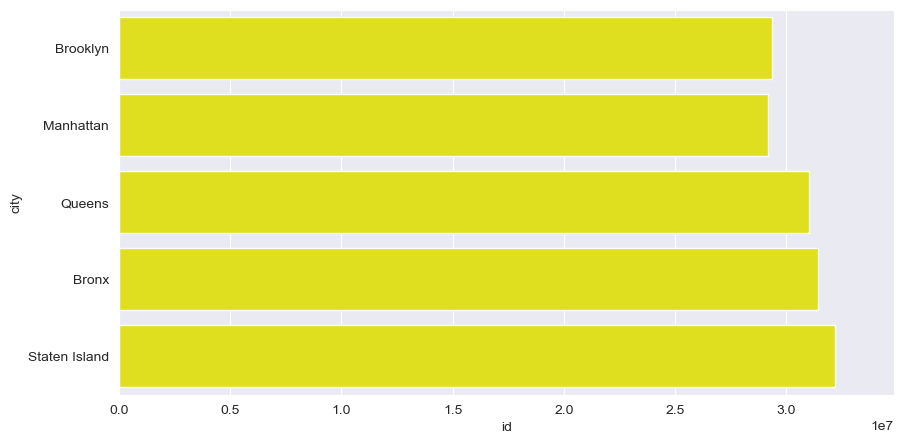

In [32]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(10,5))

sns.barplot(y='city', x='id', color="yellow", data=air_bnb, errwidth = False)

<h4>Average Airbnb Price by City<h4>

In [33]:
#Average airbnb price by city
avg_price_city = city_grp['price'].mean().round(2).nlargest()
avg_price_city

city
Bronx            630.28
Queens           629.93
Brooklyn         627.26
Manhattan        623.14
Staten Island    620.59
Name: price, dtype: float64

<h4>Average Airbnb Price by Room Type<h4>

In [34]:
avg_price_room = room_grp['price'].mean().round(2).nlargest()
avg_price_room

room type
Hotel room         681.30
Shared room        632.49
Private room       627.40
Entire home/apt    624.29
Name: price, dtype: float64

<h4>Distribution of Properties by rating<h4>

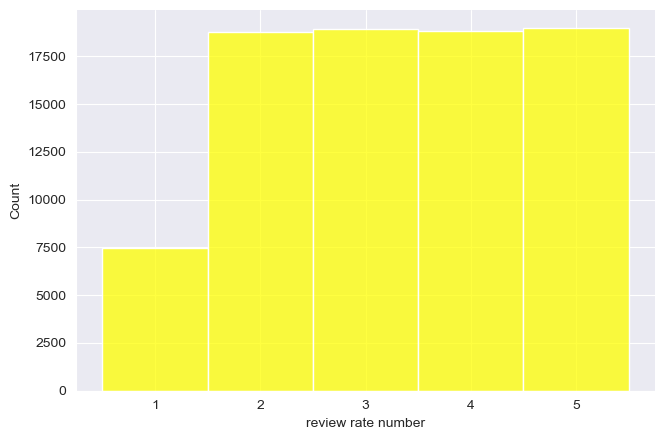

In [35]:
sns.displot(air_bnb['review rate number'], color='yellow', discrete=True, aspect=1.5, height=4.5, kind='hist')